In [1]:
import matplotlib.pyplot as plt
import numpy as np
from imblearn.under_sampling import RandomUnderSampler 
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

In [2]:
sns.set(rc={'figure.figsize':(15,15)})

In [3]:
train = pd.read_csv('../initial/Train.csv')
test = pd.read_csv('../initial/Test.csv')
merged = pd.concat([train.set_index('user_id'), test.set_index('user_id')])

In [4]:
def data_preparation (train_y):
    #train_y.drop('MRG', axis=1, inplace = True)
    train_y.drop('ARPU_SEGMENT', axis=1, inplace = True)
    train_y.drop("MRG", axis=1, inplace=True)
    try:
        train_y.set_index('user_id', inplace = True)
    except:
        pass
    target = None
    if 'CHURN' in train_y.columns:
        target = train_y['CHURN']
        train_y.drop('CHURN', inplace=True, axis=1)

    # Categorical TENURE
    sorted_tenure = {i : j for i, j in zip(np.sort(train_y['TENURE'].unique()), range(8))}
    train_y['TENURE'].replace(to_replace=sorted_tenure, inplace=True)
    
    # Categorical REGION
    train_y['REGION'].fillna('UNKNOWN', inplace=True)
    sorted_region = {i : j for i, j in zip(train_y['REGION'].value_counts().index, range(len(train_y['REGION'].value_counts().index)))}
    train_y['REGION'].replace(to_replace=sorted_region, inplace=True)
    
    train_y['TOP_PACK'].fillna('Unknown', inplace = True)
    
    train_y['FREQ_TOP_PACK'].fillna(0, inplace = True)
    train_y['MONTANT'].fillna(0, inplace = True)
    train_y['FREQUENCE_RECH'].fillna(0, inplace = True)
    train_y['REVENUE'].fillna(0, inplace = True)
    train_y['FREQUENCE'].fillna(0, inplace = True)
    train_y['ON_NET'].replace(to_replace=0, value=1, inplace=True)
    train_y['ON_NET'].fillna(0, inplace=True)
    train_y['ORANGE'].replace(to_replace=0, value=1, inplace=True)
    train_y['ORANGE'].fillna(0, inplace=True)
    train_y['TIGO'].replace(to_replace=0, value=1, inplace=True)
    train_y['TIGO'].fillna(0, inplace=True)
    train_y['ZONE1'].replace(to_replace=0, value=1, inplace=True)
    train_y['ZONE1'].fillna(0, inplace=True)
    train_y['ZONE2'].replace(to_replace=0, value=1, inplace=True)
    train_y['ZONE2'].fillna(0, inplace=True)
    train_y['DATA_VOLUME'].replace(to_replace=0, value=1, inplace=True)
    train_y['DATA_VOLUME'].fillna(0, inplace=True)
    #Popularity
    
    train_y.drop('TOP_PACK', axis=1, inplace=True)
    # Move target to last position
    if target is not None:
        train_y.insert(train_y.shape[1], 'CHURN', target)

    return(train_y)

In [5]:
Preproc_train = data_preparation(train)
Preproc_train.reset_index(inplace=True)
user_id_index = Preproc_train['user_id']
Preproc_train.drop('user_id', inplace=True, axis=1)

In [6]:
rus = RandomUnderSampler(random_state=1, sampling_strategy='all', replacement=True)
X_res_rus, y_res_rus = rus.fit_resample(Preproc_train.loc[:, Preproc_train.columns!='CHURN'], Preproc_train['CHURN'])

In [7]:
len(y_res_rus)

807972

<AxesSubplot:xlabel='REGULARITY', ylabel='Count'>

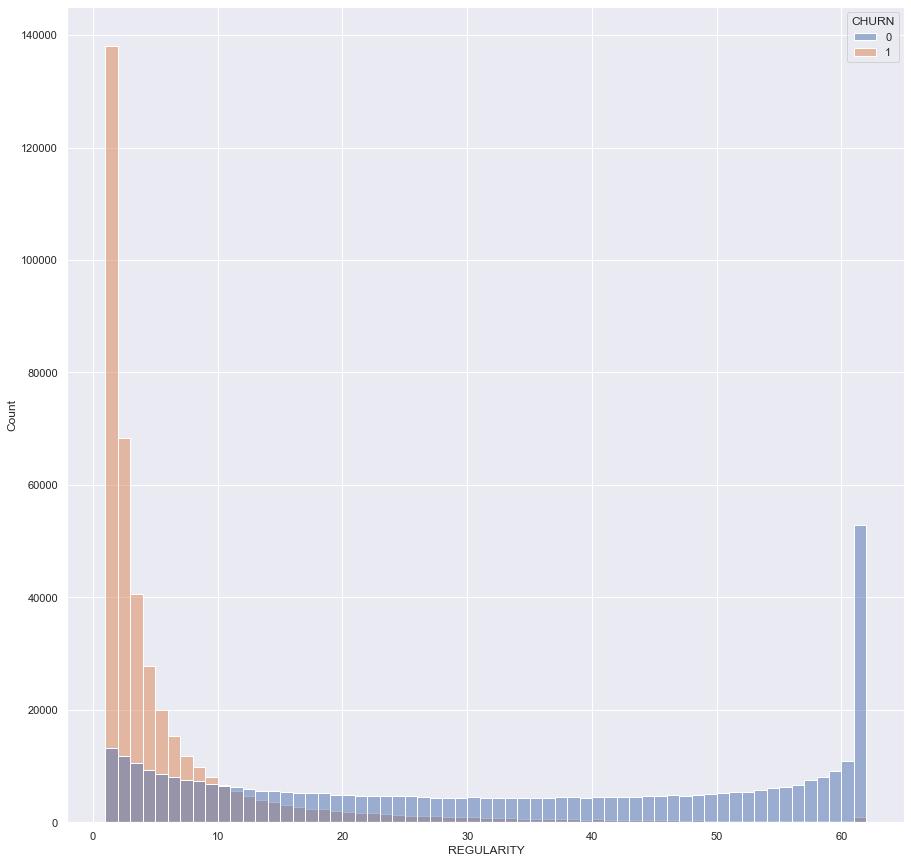

In [8]:
sns.histplot(x=X_res_rus["REGULARITY"], hue=y_res_rus, bins=61)

In [9]:
X_res_rus["CHURN"] = y_res_rus

In [10]:
X_res_rus.to_csv("dataset_4_train.csv")

In [11]:
Preproc_test = data_preparation(test)
Preproc_test.to_csv('dataset_4_test.csv')

# Данные не перемешиваются
train_merged = data_preparation(merged)
dirty_train = train_merged.iloc[:train.shape[0]]
dirty_test = train_merged[~train_merged.index.isin(dirty_train.index)]
dirty_train.to_csv('dirty_initial_train.csv')
dirty_test.to_csv('dirty_initial_test.csv')